In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#  Read data

In [2]:
df = pd.read_csv('car.csv')

# Data Information

In [3]:
df.shape

(8128, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
 11  selling_price  8128 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [5]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


# Split dataframe to features and label

In [6]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [7]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,Ford,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Nissan,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,BMW,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Ford,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [8]:
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

# impute missing values

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X.iloc[:, 7:11])
X.iloc[:, 7:11] = imputer.transform(X.iloc[:, 7:11])

In [10]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8128 non-null   object 
 1   year          8128 non-null   int64  
 2   km_driven     8128 non-null   int64  
 3   fuel          8128 non-null   object 
 4   seller_type   8128 non-null   object 
 5   transmission  8128 non-null   object 
 6   owner         8128 non-null   object 
 7   mileage       8128 non-null   float64
 8   engine        8128 non-null   float64
 9   max_power     8128 non-null   float64
 10  seats         8128 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 698.6+ KB


# encode catagorical columns

In [11]:
X = pd.get_dummies(data=X)

# data visualization

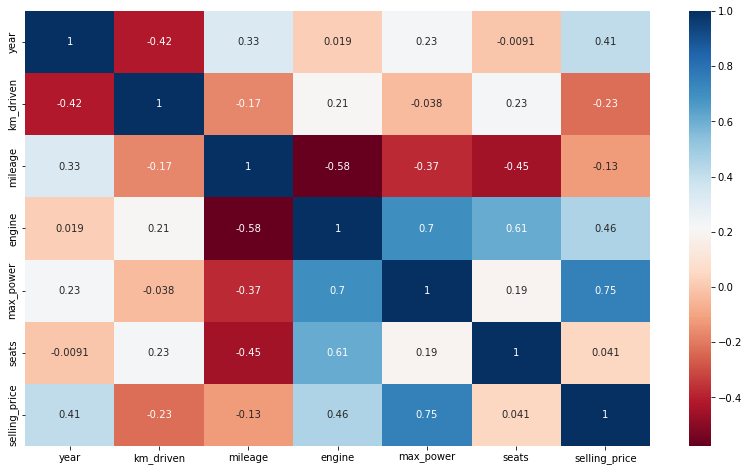

In [12]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

# split data to train and test

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Training Data

### Liner regression

In [14]:
# train data
linaear_regressor = LinearRegression()
linaear_regressor.fit(X_train, Y_train)

LinearRegression()

In [15]:
# accuracy on training data
training_acc = np.ceil(linaear_regressor.score(X_train, Y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  69.0 %


In [16]:
# accuracy on testing data
testing_acc = np.ceil(linaear_regressor.score(X_test, Y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

The Testing_acc Accuracy =  70.0 %


In [17]:
print(linaear_regressor.coef_)
print(linaear_regressor.intercept_)

[ 3.08676752e+04 -9.59664709e-01  1.30061389e+04  6.31925448e+01
  1.30743692e+04 -3.06535386e+04 -1.43594694e+04  1.30650254e+04
 -5.99579307e+03 -2.38514744e+03  9.67538452e+03 -8.61444929e+02
 -4.41576929e+04  1.42826088e+05 -9.78069504e+04  1.96401525e+05
 -4.43238698e+04 -1.52077655e+05  2.36881641e+05 -2.36881641e+05
 -4.11722204e+05 -3.99952689e+05 -4.56643540e+05  1.68156082e+06
 -4.13242388e+05]
-62142852.628795505


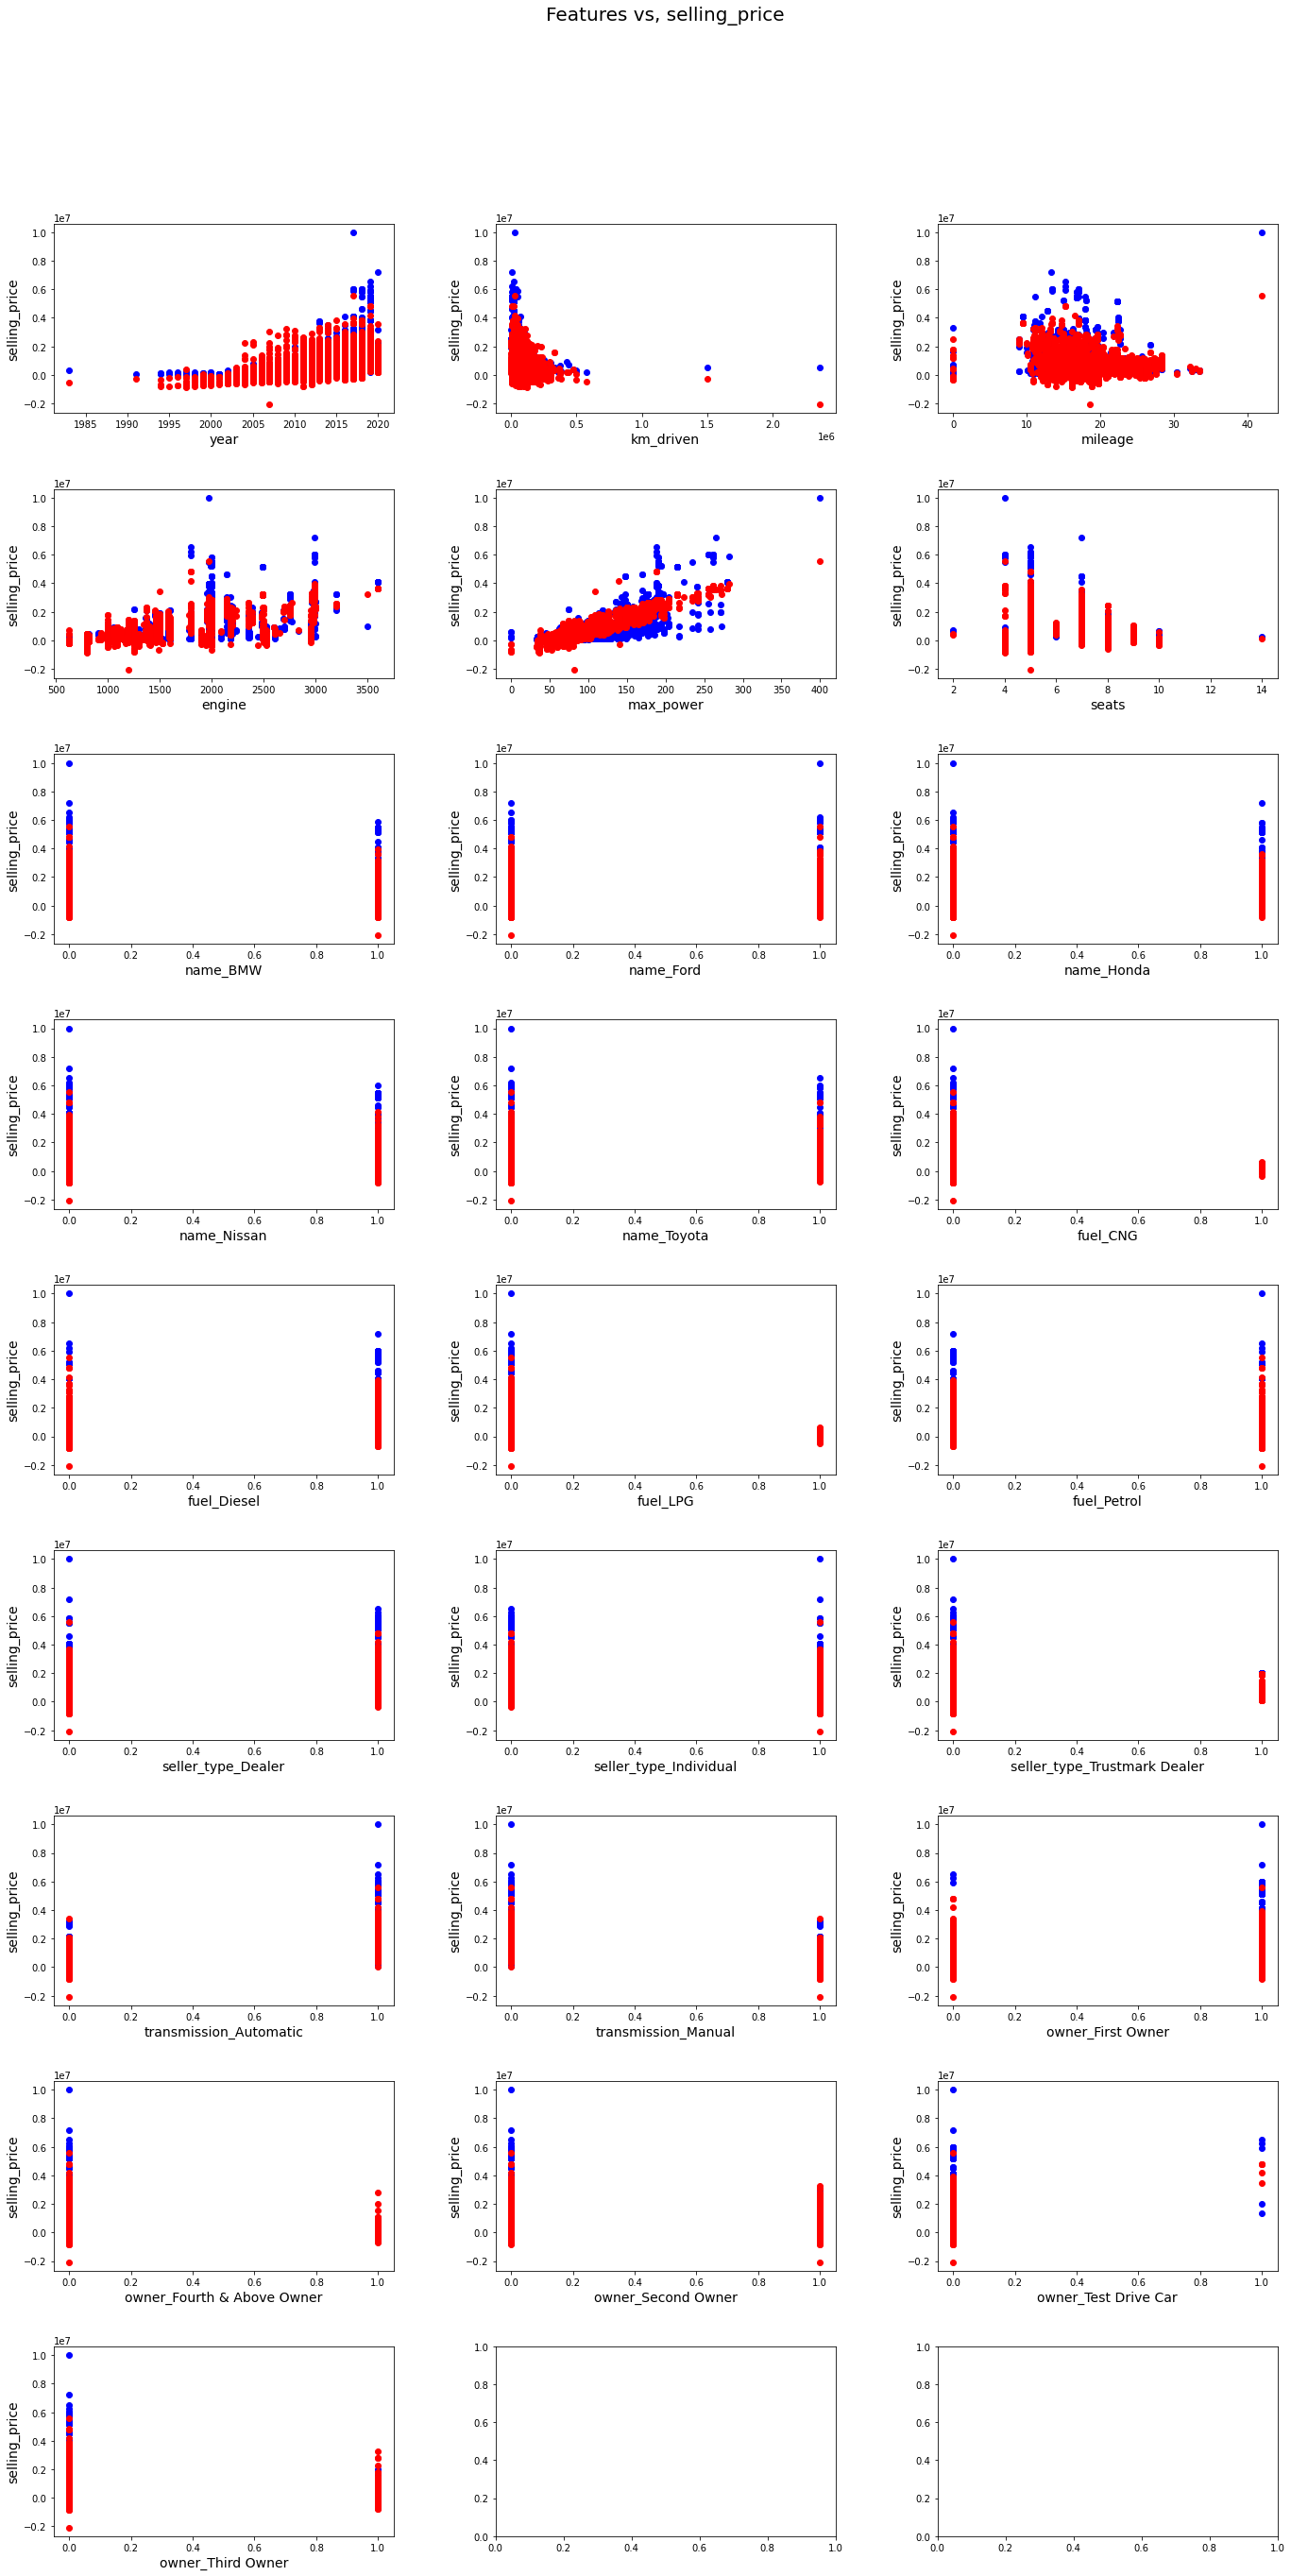

In [31]:
col_num = 3
row_num = int(np.ceil(X_train.shape[1] / col_num))


fig, ax = plt.subplots(row_num, col_num, figsize=(20, 40))

k = 0
I = list(range(0, 9))
J = list(range(0, 3))
for i in I:
    for j in J:
        if(k < 25):
            ax[i, j].scatter(X.iloc[:, k], Y, c='b')
            ax[i, j].scatter(X.iloc[:, k], linaear_regressor.predict(X), c='r')
            ax[i, j].set_ylabel('selling_price', fontsize=14)
            ax[i, j].set_xlabel(X.columns[k], fontsize=14)
            k += 1
fig.suptitle('Features vs, selling_price', fontsize=20)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9, wspace=0.3, hspace=0.4)
plt.show()


### polynomial regression

In [19]:
# make data polynomial of degree 2

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train);
X_poly_test = poly.fit_transform(X_test)

In [20]:
# train data

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, Y_train)

LinearRegression()

In [21]:
# accuracy on training data

training_acc = np.ceil(poly_regressor.score(X_poly_train, Y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  92.0 %


In [22]:
# accuracy on testing data

testing_acc = np.ceil(poly_regressor.score(X_poly_test, Y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

The Testing_acc Accuracy =  92.0 %


In [23]:
print(poly_regressor.coef_)
print(poly_regressor.intercept_)

[-6.09363821e+02 -1.15271335e+06  7.58944909e+02  3.63510027e+05
  3.10075751e+03 -1.04516949e+06  5.80559699e+06  3.57697219e+05
 -6.52729467e+05  1.85812161e+06 -2.43219052e+06  8.69107514e+05
 -1.20450232e+06 -6.92481417e+06  3.44958024e+05  7.78436756e+06
 -4.03128229e+06  9.70413160e+06 -5.67285483e+06 -1.25745114e+07
  1.25745114e+07 -5.50390811e+06  3.92679051e+06  5.23459626e+05
 -1.09322401e+02  1.05376719e+06  7.31059899e+02 -7.68233219e-02
 -4.88058235e+02 -6.99200715e+00  1.30685383e+03 -7.13419043e+03
 -2.36727437e+05 -2.34945311e+05 -2.39253447e+05 -2.31858473e+05
 -2.37552368e+05 -2.89476402e+05 -2.85680853e+05 -2.94784402e+05
 -3.10395407e+05 -3.87358657e+05 -4.09788074e+05 -3.83190341e+05
 -5.69654864e+05 -6.10682197e+05 -2.31100901e+05 -2.46307321e+05
 -2.41020664e+05 -2.20726852e+05 -2.41181327e+05  1.11293048e-07
 -1.29346368e-02  1.00962154e-03 -2.27072542e-02 -1.70732126e-01
 -7.99510513e+01 -7.98990736e+01 -8.00345361e+01 -7.95426433e+01
 -7.99277653e+01 -1.00000